In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("training.csv",delimiter = ";",decimal=",")
df_val = pd.read_csv("validation.csv",delimiter = ";",decimal=",")

df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,18.75,0.000750,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,23.50,0.000900,u,g,q,v,8.500,t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,34.17,0.000917,u,g,c,v,4.500,t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,27.83,0.000154,u,g,W,v,3.750,t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


In [3]:
df.drop(df[df["variable5"] == "gg"].index,inplace=True)
df.drop(df[df["variable6"] == "r"].index,inplace=True)
df.drop(df[df["variable7"] == "o"].index,inplace=True)

df

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.75,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.29,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.00,f,t,1,f,g,96.0,19,960000.0,t,0,no.
4,b,32.33,0.000350,u,g,k,v,0.50,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.50,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,a,18.75,0.000750,u,g,q,v,2.71,t,t,5,f,g,NaN,26726,NaN,t,1,yes.
3696,a,23.50,0.000900,u,g,q,v,8.50,t,t,5,t,g,120.0,0,1200000.0,t,1,yes.
3697,b,34.17,0.000917,u,g,c,v,4.50,t,t,12,t,g,0.0,221,0.0,NaN,1,yes.
3698,b,27.83,0.000154,u,g,W,v,3.75,t,t,5,t,g,100.0,3,1000000.0,NaN,1,yes.


In [4]:
y = df.classLabel.replace("no.",0).replace("yes.",1)
y_val = df_val.classLabel.replace("no.",0).replace("yes.",1) 

In [5]:
df.drop("classLabel",axis=1,inplace=True)
df_val.drop("classLabel",axis=1,inplace=True)

In [6]:
df = pd.concat([df,df_val]).reset_index()

df.drop("index",axis=1,inplace=True)

In [7]:
float_cols = ["variable2","variable3","variable8","variable14"]

In [8]:
df.drop(["variable17","variable4"],axis=1,inplace=True) 

In [9]:
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]

categorical_cols

['variable1',
 'variable5',
 'variable6',
 'variable7',
 'variable9',
 'variable10',
 'variable12',
 'variable13',
 'variable18']

In [10]:
X = df[:3634]
X_val = df[3634:].reset_index()

X_val.drop("index",axis=1,inplace=True)

X_val

,variable1,variable2,variable3,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable18,variable19
0,b,32.33,0.000750,g,e,bb,1.585,t,f,0,t,s,420.0,0,NaN,1
1,b,23.58,0.000179,g,c,v,0.540,f,f,0,t,g,136.0,1,NaN,0
2,b,36.42,0.000075,p,d,v,0.585,f,f,0,f,g,240.0,3,NaN,1
3,b,18.42,0.001041,p,aa,v,0.125,t,f,0,f,g,120.0,375,NaN,0
4,b,24.50,0.001334,p,aa,v,0.040,f,f,0,t,g,120.0,475,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,23.08,0.001150,g,i,v,3.500,t,t,9,f,g,56.0,742,t,0
196,a,57.08,0.001950,g,c,v,5.500,t,t,7,f,g,0.0,3000,NaN,1
197,b,30.83,0.000000,g,W,v,1.250,t,t,1,f,g,202.0,0,NaN,0
198,b,19.67,0.000037,g,q,v,2.000,t,t,2,t,g,80.0,0,t,1


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer, MaxAbsScaler

In [12]:
float_features = float_cols
float_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))])

In [13]:
categorical_features = categorical_cols
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder())])

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('float', float_transformer, float_features),
        ('cat', categorical_transformer, categorical_features)])

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('scaler', StandardScaler()),
                     ("classifier",LGBMClassifier(learning_rate=0.112,n_estimators=250))]) 

In [16]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('float',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['variable2', 'variable3',
                                                   'variable8', 'variable14']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['variable1', 'variable5',
                                                   'variable6', 'variable7',
       

In [17]:
clf.score(X_val,y_val)

0.88

In [18]:
import matplotlib.pyplot as plt

importance = clf["classifier"].feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1093.00000
Feature: 1, Score: 1110.00000
Feature: 2, Score: 990.00000
Feature: 3, Score: 990.00000
Feature: 4, Score: 83.00000
Feature: 5, Score: 28.00000
Feature: 6, Score: 102.00000
Feature: 7, Score: 38.00000
Feature: 8, Score: 76.00000
Feature: 9, Score: 39.00000
Feature: 10, Score: 116.00000
Feature: 11, Score: 66.00000
Feature: 12, Score: 1.00000
Feature: 13, Score: 10.00000
Feature: 14, Score: 11.00000
Feature: 15, Score: 44.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 25.00000
Feature: 18, Score: 24.00000
Feature: 19, Score: 91.00000
Feature: 20, Score: 75.00000
Feature: 21, Score: 11.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 44.00000
Feature: 24, Score: 53.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 105.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 173.00000
Feature: 30, Score: 33.00000
Feature: 31, Score: 168.00000
Feature: 32, Score: 22.00000
Feature: 33, Score: 90.00000
Feature: 34, Score:

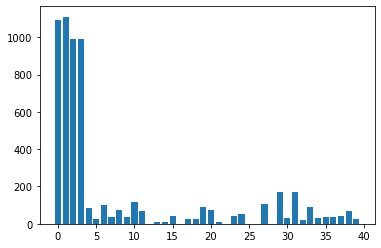

In [19]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predicted = clf.predict(X_val)

In [21]:
results = confusion_matrix(y_val, predicted)

In [22]:
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(y_val, predicted)) 
print('\nReport :')
print(classification_report(y_val, predicted)) 

Confusion Matrix :

[[88 19]
 [ 5 88]]

Accuracy Score : 0.88

Report :
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       107
           1       0.82      0.95      0.88        93

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



In [23]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))